# Questão 1

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [59]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [60]:
df = pd.read_csv('data/BostonHousing.csv', header=(0))
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [61]:
df = df.dropna()
df = df.drop(df.columns[[0]], axis=1)
df

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [62]:
ylabel = df.columns[-1]

In [63]:
df = df.to_numpy()
nrow,ncol = df.shape
y = df[:,-1]
X = df[:,0:ncol-1]

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Regressão Linear Múltipla

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [66]:
model = linear_model.LinearRegression()

In [67]:
best_degree = 0
best_r2 = 0

for degree in range(1,6):

    poly_lin = PolynomialFeatures(degree=degree)

    x_train_poly_lin = poly_lin.fit_transform(x_train)
    model.fit(x_train_poly_lin, y_train)

    x_test_poly_lin = poly_lin.transform(x_test)
    y_test_pred = model.predict(x_test_poly_lin)

    r2 = r2_score(y_test, y_test_pred)
    print('Grau polinomial:', degree)
    print('R2 no conjunto de teste:', r2)

    if r2 > best_r2:
        best_degree = degree
        best_r2 = r2

r2_lm = best_r2

Grau polinomial: 1
R2 no conjunto de teste: 0.7150613796634331
Grau polinomial: 2
R2 no conjunto de teste: 0.5746131920657745
Grau polinomial: 3
R2 no conjunto de teste: -29914.798370277087
Grau polinomial: 4
R2 no conjunto de teste: -2605.137767242186
Grau polinomial: 5
R2 no conjunto de teste: -696.0668771809401


## LASSO

In [68]:
from sklearn.linear_model import Lasso

In [69]:
best_degree = 0
best_r2 = 0
for degree in range(1,6):
    poly_lasso = PolynomialFeatures(degree=degree) 
    x_train_poly_lasso = poly_lasso.fit_transform(x_train)

    model_lasso = Lasso(alpha=0, max_iter=10000) 
    model_lasso.fit(x_train_poly_lasso, y_train)

    x_test_poly_lasso = poly_lasso.transform(x_test)
    y_pred_lasso = model_lasso.predict(x_test_poly_lasso)

    r2_lasso = r2_score(y_test, y_pred_lasso)
    print('Grau polinomial:', degree)
    print('R2 no conjunto de teste:', r2_lasso)

    if r2_lasso > best_r2:
        best_degree = degree
        best_r2 = r2_lasso

r2_lasso = best_r2

Grau polinomial: 1
R2 no conjunto de teste: 0.7150613796634293
Grau polinomial: 2
R2 no conjunto de teste: 0.5482486195966325


c:\ProgramData\miniconda3\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\miniconda3\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\miniconda3\Lib\site-packages\skle

Grau polinomial: 3
R2 no conjunto de teste: -1.315556965491441


c:\ProgramData\miniconda3\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Grau polinomial: 4
R2 no conjunto de teste: -0.17698703510691538


c:\ProgramData\miniconda3\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Grau polinomial: 5
R2 no conjunto de teste: -0.5667426872046772


In [70]:
alphas = [i for i in range(0,100)]
r2s = []
for alpha in alphas:
    poly_lasso = PolynomialFeatures(degree=best_degree) 
    x_train_poly_lasso = poly_lasso.fit_transform(x_train)

    model_lasso = Lasso(alpha=alpha, max_iter=10000) 
    model_lasso.fit(x_train_poly_lasso, y_train)

    x_test_poly_lasso = poly_lasso.transform(x_test)
    y_pred_lasso = model_lasso.predict(x_test_poly_lasso)

    r2_lasso = r2_score(y_test, y_pred_lasso)
    r2s.append(r2_lasso)

c:\ProgramData\miniconda3\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


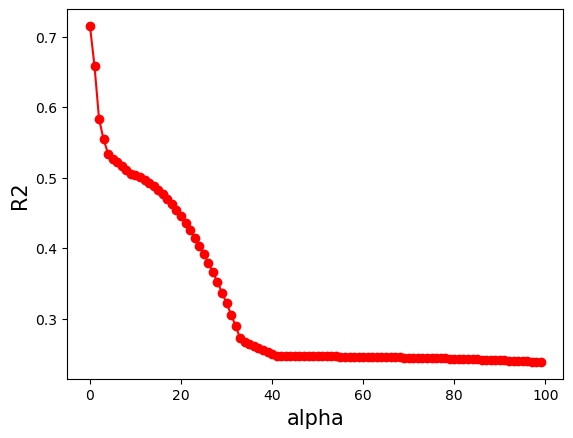

In [71]:
plt.plot(alphas, r2s, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

##  Ridge Regression

In [72]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [74]:
best_degree = 0
best_r2 = 0
for degree in range(1, 6):
    
    poly_ridge = PolynomialFeatures(degree=degree)
    x_train_poly_ridge = poly_ridge.fit_transform(x_train_scaled)
    
    model_ridge = Ridge(alpha=0)
    model_ridge.fit(x_train_poly_ridge, y_train)
    
    x_test_poly_ridge = poly_ridge.transform(x_test_scaled)
    y_pred_ridge = model_ridge.predict(x_test_poly_ridge)
    
    r2_ridge = r2_score(y_test, y_pred_ridge)
    print('Grau polinomial:', degree)
    print('R2 no conjunto de teste:', r2_ridge)

    if r2_lasso > best_r2:
        best_degree = degree
        best_r2 = r2_ridge

r2_ridge = best_r2

Grau polinomial: 1
R2 no conjunto de teste: 0.7150613796634315
Grau polinomial: 2
R2 no conjunto de teste: 0.5708606991188223
Grau polinomial: 3
R2 no conjunto de teste: -1637957.117633506
Grau polinomial: 4
R2 no conjunto de teste: -101.90296068799289
Grau polinomial: 5
R2 no conjunto de teste: -78.95584860491105


C:\Users\pedro\AppData\Roaming\Python\Python313\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.39211e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
C:\Users\pedro\AppData\Roaming\Python\Python313\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.13195e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [75]:
alphas = [i for i in range(0,100)]
r2s = []
for alpha in alphas:
    poly_ridge = PolynomialFeatures(degree=best_degree)
    x_train_poly_ridge = poly_ridge.fit_transform(x_train_scaled)
    
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(x_train_poly_ridge, y_train)
    
    x_test_poly_ridge = poly_ridge.transform(x_test_scaled)
    y_pred_ridge = model_ridge.predict(x_test_poly_ridge)
    
    r2_ridge = r2_score(y_test, y_pred_ridge)
    r2s.append(r2_ridge)

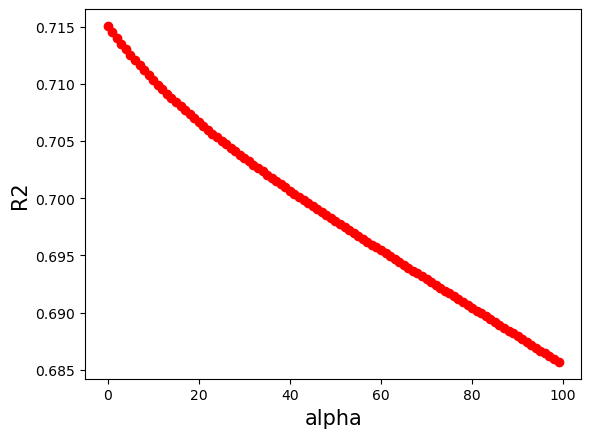

In [76]:
plt.plot(alphas, r2s, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

In [79]:
if r2_lm > r2_lasso and r2_lm > r2_ridge:
    print('O modelo com o melhor R2 foi: Linear Regression')
elif r2_lasso > r2_lm and r2_lasso > r2_ridge:
    print('O modelo com o melhor R2 foi: Lasso')
else:
    print('O modelo com o melhor R2 foi: Ridge')

O modelo com o melhor R2 foi: Linear Regression


# Questão 2